In [1]:
{-# LANGUAGE FlexibleContexts, MonadComprehensions, NoImplicitPrelude, RebindableSyntax, TypeFamilies #-}
import Language.Stochaskell
stochaskell

Stochaskell, version 0.1.0
Copyright (C) 2015-2019 David A Roberts
This program comes with ABSOLUTELY NO WARRANTY.
This is free software, and you are welcome to redistribute it
under certain conditions; see the LICENSE for details.

Using installation directory at 
  /home/jovyan/stochaskell

In [2]:
import IHaskell.Display

let v_0_0 = sin a :: R
    v_0_1 = v_0_0 + 4.2 :: R
 in v_0_1

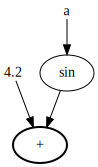

In [3]:
let z = 4.2 + sin (symbol "a")
print z
svg <$> vizIR (return z)

let v_0_0 = 
      [ let v_1_0 = 2 * i_1_1 :: Z
            v_1_1 = v_1_0 + 1 :: Z
         in v_1_1
      | i_1_1 <- 1...n ] :: ZVec
 in v_0_0

let v_0_0 = 
      [ let v_1_0 = i_1_1 - i_1_2 :: Z
            v_1_1 = v_1_0 * v_1_0 :: Z
         in v_1_1
      | i_1_1 <- 1...n, i_1_2 <- 1...k ] :: ZMat
 in v_0_0

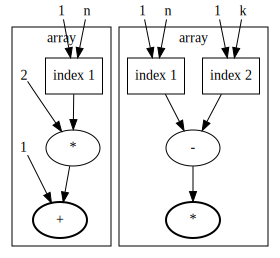

In [4]:
let n = symbol "n"
    k = symbol "k"
let v = vector [ 2*i + 1 | i <- 1...n ] :: ZVec
    m = matrix [ (i-j)^2 | i <- 1...n, j <- 1...k ] :: ZMat
print v
print m
svg <$> vizIR (return (v,m))

In [5]:
prior :: P (Z,RVec,RVec)
prior = do
  n <- poisson 5
  let base = uniform 0 5
  x <- orderedSample n base
  let mu = vector [ 0 | i <- 1...n ]
      kernel a b = exp (-(a - b)^2 / 2) + if a == b then 1e-6 else 0
      cov = matrix [ kernel (x!i) (x!j) | i <- 1...n, j <- 1...n ]
  y <- normal mu cov
  return (n,x,y)

In [6]:
let posterior = [ y | (n,x,y) <- prior, n == 5, x == list [0.5,1.5,2.5,3.5,4.5] ]

let v_0_0 = getExternal x_show_0_0 :: Z
    v_0_1 = getExternal x_show_0_0 :: R
    v_0_2 = getExternal x_show_0_1 :: Array [(1,x_show_0_0)] R
    v_0_3 = 
      [ 0.0
      | i_1_1 <- 1...x_show_0_0 ] :: RVec
    v_0_4 = 
      [ let v_1_0 = x_show_0_1!i_1_1 - x_show_0_1!i_1_2 :: R
            v_1_1 = v_1_0 * v_1_0 :: R
            v_1_2 = v_1_1 / 2.0 :: R
            v_1_3 = negate v_1_2 :: R
            v_1_4 = exp v_1_3 :: R
            v_1_5 = x_show_0_1!i_1_1 == x_show_0_1!i_1_2 :: B
            v_1_6 = ifThenElse v_1_5 1.0e-6 0.0 :: R
            v_1_7 = v_1_4 + v_1_6 :: R
         in v_1_7
      | i_1_1 <- 1...x_show_0_0, i_1_2 <- 1...x_show_0_0 ] :: RMat
    v_0_5 = getExternal x_show_0_2 :: RVec
 in do x_show_0_0 <- poisson 5.0 :: P Z
       x_show_0_1 <- orderedSample (uniform 0.0 5.0 :: P R) x_show_0_0 :: P Array [(1,x_show_0_0)] R
       x_show_0_2 <- multi_normal v_0_3 v_0_4 :: P RVec
       return [x_show_0_2]

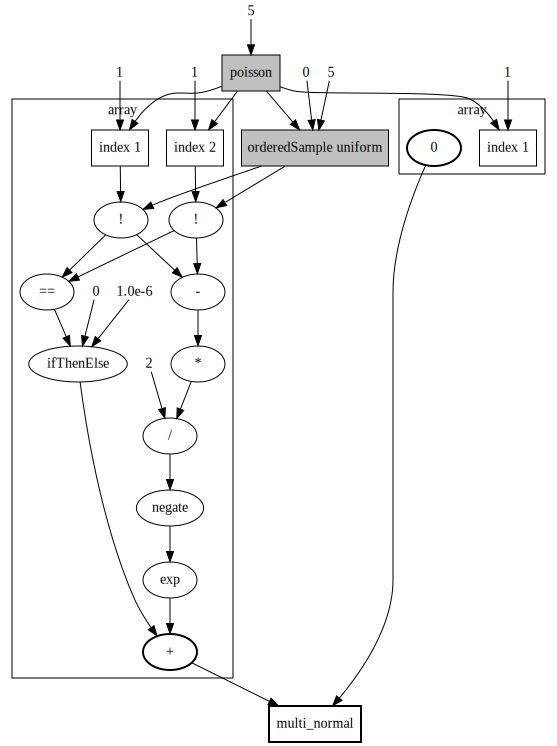

In [7]:
print posterior
svg <$> vizIR posterior